In [40]:
%matplotlib inline

In [63]:
from matplotlib import pyplot as plt

In [139]:
from shapely.geometry import Point

In [2]:
import geopandas

In [4]:
s = geopandas.read_file('../shapefiles/taxi_zones_latlon.shp')

In [11]:
dir(s.geometry[1])

['__and__',
 '__array_interface__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_crs',
 '_ctypes_data',
 '_geom',
 '_get_coords',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 'almost_equals',
 'area',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',
 'distance',
 'empty',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'geoms',
 'has_z',
 'impl',
 'int

In [32]:
import numpy as np

In [106]:
theta = np.arange(0, 2*np.pi, (2*np.pi)/20)
xvals = 1.0e-4*np.cos(theta)
yvals = 1.0e-4*np.sin(theta)

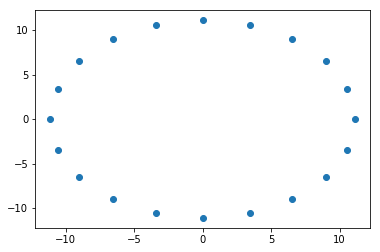

In [107]:
plt.plot(xvals.round(10) * 111111, yvals.round(10) * 111111, 'o')

In [108]:
l = []
for i, g in enumerate(s.geometry):
    if g.type == 'Polygon':
        l.append(np.array(s.geometry[i].exterior.coords.xy).T)
    elif g.type == 'MultiPolygon':
        for pol in s.geometry[i].geoms:
            l.append(np.array(pol.exterior.coords.xy).T)
l = np.concatenate(l, axis=0)

In [124]:
shifts = np.tile(np.array((xvals, yvals)).T, reps=(l.shape[0], 1))

In [125]:
l2 = np.repeat(l, repeats=len(xvals), axis=0)

In [146]:
l3 = l2 + shifts

In [119]:
shifts

array([[  1.00000000e-04,   0.00000000e+00],
       [  9.51056516e-05,   3.09016994e-05],
       [  8.09016994e-05,   5.87785252e-05],
       ..., 
       [  5.87785252e-05,  -8.09016994e-05],
       [  8.09016994e-05,  -5.87785252e-05],
       [  9.51056516e-05,  -3.09016994e-05]])

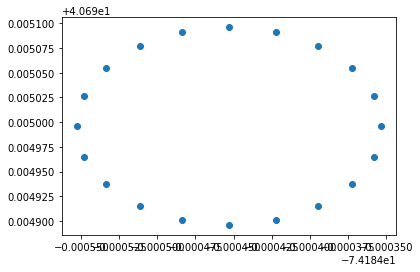

In [134]:
plt.plot(*(l3[:20]).T, 'o')

In [147]:
l3 = np.array([Point(xy) for xy in l3])

TypeError: float() argument must be a string or a number, not 'Point'

In [ ]:
l3

In [36]:
s['geom_type'] = s.geometry.type

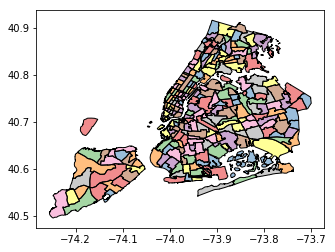

In [41]:
s.geometry.plot()